<a href="https://colab.research.google.com/github/hurdi7/Sustainable_product_purchasing_behaviour/blob/main/Test%20Data%20and%20Python%20Files/Test%20Basic%20ML%20Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#!pip install semopy

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import semopy

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/hurdi7/Sustainable_product_purchasing_behaviour/refs/heads/main/Test%20Data%20and%20Python%20Files/Test%20data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   GC      98 non-null     int64
 1   DE1     98 non-null     int64
 2   DE2     98 non-null     int64
 3   DE3     98 non-null     int64
 4   CS1     98 non-null     int64
 5   CS2     98 non-null     int64
 6   CS3     98 non-null     int64
 7   SN1     98 non-null     int64
 8   SN2     98 non-null     int64
 9   SN3     98 non-null     int64
 10  ASP1    98 non-null     int64
 11  ASP2    98 non-null     int64
 12  ASP3    98 non-null     int64
 13  PCE1    98 non-null     int64
 14  PCE2    98 non-null     int64
 15  PCE3    98 non-null     int64
 16  TLP1    98 non-null     int64
 17  TLP2    98 non-null     int64
 18  TLP3    98 non-null     int64
 19  SPPI1   98 non-null     int64
 20  SPPI2   98 non-null     int64
 21  SPPI3   98 non-null     int64
 22  SPPB1   98 non-null     int64
 23  SPPB2   98 non-nu

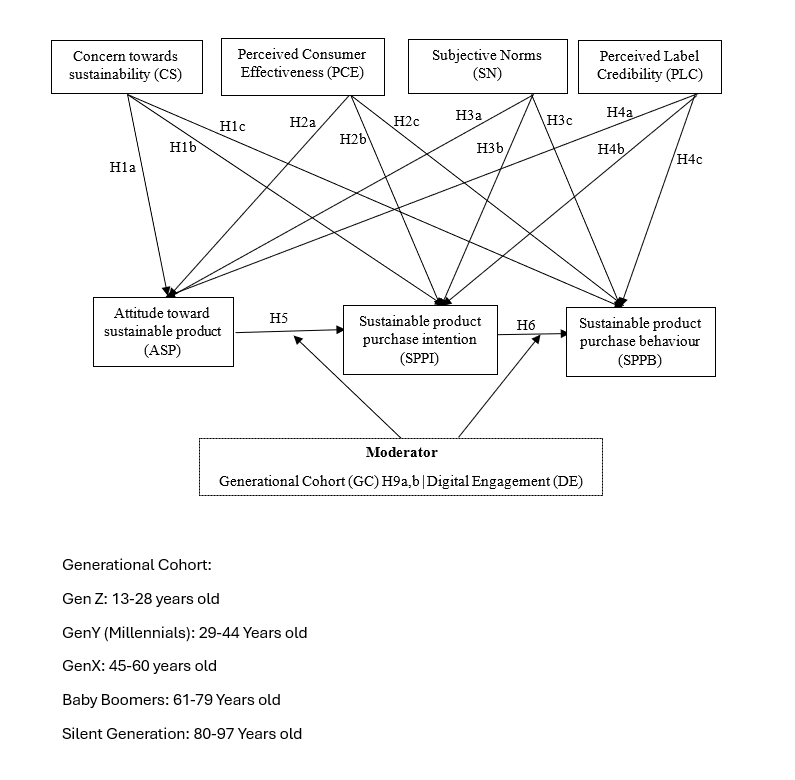

In [16]:
model_spec = """
    # Measurement model
    CS =~ CS1 + CS2 + CS3
    PCE =~ PCE1 + PCE2 + PCE3
    SN =~ SN1 + SN2 + SN3
    TLP =~ TLP1 + TLP2 + TLP3
    ASP =~ ASP1 + ASP2 + ASP3
    SPPI =~ SPPI1 + SPPI2 + SPPI3
    SPPB =~ SPPB1 + SPPB2 + SPPB3
    DE =~ DE1 + DE2 + DE3

    # Regressions
    ASP ~ CS + PCE + SN + TLP
    SPPI ~ CS + PCE + SN + TLP + ASP
    SPPB ~ CS + PCE + SN + TLP + SPPI

"""
print(model_spec)


    # Measurement model
    CS =~ CS1 + CS2 + CS3
    PCE =~ PCE1 + PCE2 + PCE3
    SN =~ SN1 + SN2 + SN3
    TLP =~ TLP1 + TLP2 + TLP3
    ASP =~ ASP1 + ASP2 + ASP3
    SPPI =~ SPPI1 + SPPI2 + SPPI3
    SPPB =~ SPPB1 + SPPB2 + SPPB3
    DE =~ DE1 + DE2 + DE3

    # Regressions
    ASP ~ CS + PCE + SN + TLP
    SPPI ~ CS + PCE + SN + TLP + ASP
    SPPB ~ CS + PCE + SN + TLP + SPPI




In [17]:
from semopy import Model
model = Model(model_spec)
model.fit(df)
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,ASP,~,CS,-1.892921,11.932978,-0.158629,0.873961
1,ASP,~,PCE,7.228558,37.710674,0.191685,0.847989
2,ASP,~,SN,0.210544,2.303046,0.09142,0.927159
3,ASP,~,TLP,-0.448889,3.119086,-0.143917,0.885566
4,SPPI,~,CS,-0.281249,990503.228102,-0.0,1.0
...,...,...,...,...,...,...,...
75,SPPI2,~~,SPPI2,0.489870,0.085069,5.758476,0.0
76,SPPI3,~~,SPPI3,0.442804,0.091004,4.865749,0.000001
77,TLP1,~~,TLP1,0.399339,0.063221,6.316517,0.0
78,TLP2,~~,TLP2,0.635134,0.092171,6.890782,0.0


In [18]:
latent_scores = model.predict_factors(df)
df = pd.concat([df,latent_scores],axis=1)

In [19]:
df['ASP_c'] = df['ASP'] - df['ASP'].mean()
df['SPPI_c'] = df['SPPI'] - df['SPPI'].mean()
df['DE_c'] = df['DE'] - df['DE'].mean()
df['GC_c'] = df['GC'] - df['GC'].mean()

In [20]:
df['ASP_GC'] = df['ASP_c'] * df['GC_c']
df['SPPI_DE'] = df['SPPI_c'] * df['DE_c']

In [21]:
#Model with moderation

moderation_model = """
    SPPI ~ CS + PCE + SN + TLP + ASP_c + GC_c + ASP_GC
    SPPB ~ CS + PCE + SN + TLP + SPPI_c + DE_c + SPPI_DE

"""
mod_model = Model(moderation_model)
mod_model.fit(df)
mod_model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,SPPI,~,CS,-0.351305,0.053350,-6.584964,4.549960e-11
1,SPPI,~,PCE,-0.316214,0.175781,-1.798911,7.203270e-02
2,SPPI,~,SN,0.284525,0.017490,16.267449,0.000000e+00
3,SPPI,~,TLP,0.049735,0.016179,3.074063,2.111652e-03
4,SPPI,~,ASP_c,0.692942,0.057579,12.034683,0.000000e+00
5,SPPI,~,GC_c,-0.002093,0.003802,-0.550537,5.819508e-01
6,SPPI,~,ASP_GC,-0.015185,0.027893,-0.544410,5.861595e-01
7,SPPB,~,CS,1.374693,0.227086,6.053625,1.416218e-09
8,SPPB,~,PCE,2.495756,0.610595,4.087417,4.362020e-05
9,SPPB,~,SN,-0.199824,0.103965,-1.922043,5.460040e-02
